In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_prices(X, ext=''):
    plt.figure(figsize=(16,5))
    plt.title('Precio_Bolsa_Nacional_($kwh)' + ext)
    plt.xlabel('Días')
    plt.ylabel('kWh')
    plt.plot(X, color='black')
    plt.show();

# 1 Preprocesamiento <a class="anchor" id="preprocesamiento"></a>

## 1.1 Lectura y limpieza de datos <a class="anchor" id="lectura_limpieza_datos"></a>

**Leer los datos y almacenarlos por año**

In [3]:
dfs = {}
for year in range(1995, 2016):
    dfs[str(year)] = pd.read_excel(f'./datos/precios/Precio_Bolsa_Nacional_($kwh)_{year}.xlsx')

for year in range(2016, 2019):
    dfs[str(year)] = pd.read_excel(f'./datos/precios/Precio_Bolsa_Nacional_($kwh)_{year}.xls')

dfs.keys()

dict_keys(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [4]:
dfs['1995'].head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Precio Bolsa Nacional ($/kWh) 1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fecha,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,...,14.000,15.000,16.000,17.000,18.000,19.000,20.000,21.000,22.000,23.000
3,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
4,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000


**Renombrar columnas, eliminar las primeras filas inválidas, eliminar filas duplicadas y calcular el promedio por día**

In [5]:
def preprocessing_columnsname_duplicates(df_y, year):
    df = df_y.copy()
    
    df.columns = [f'col{i}' for i in range(len(df.columns))]

    # renombrar las columnas del dataframe
    columns = np.squeeze(df.loc[df[df.columns[0]] == 'Fecha'].values)
    lindex = int(df.loc[df[df.columns[0]] == 'Fecha'].index.values) + 1
    df.columns = columns
    # eliminar las filas primeras filas inválidas
    df = df.drop(list(range(0, lindex)))
    
    # eliminar filas duplicadas
    shp_old = df.shape[0]
    df = df.drop_duplicates()
    print(f'Dataframe {year}, Final shape: {df.shape}, duplicates: {shp_old - df.shape[0]}')

    return df


def generate_average_kWh(df_y):
    # Calcular promedio de los kWh
    df = pd.DataFrame()
    df['Fecha'] = df_y['Fecha']
    df['mean'] = df_y.mean(axis=1)
    return df

In [6]:
for year in range(1995, 2019):
    year = str(year)
    dfs[year] = preprocessing_columnsname_duplicates(dfs[year], year)
    dfs[year] = generate_average_kWh(dfs[year])

Dataframe 1995, Final shape: (165, 25), duplicates: 0
Dataframe 1996, Final shape: (371, 25), duplicates: 7
Dataframe 1997, Final shape: (365, 25), duplicates: 0
Dataframe 1998, Final shape: (368, 25), duplicates: 19
Dataframe 1999, Final shape: (367, 25), duplicates: 7
Dataframe 2000, Final shape: (366, 26), duplicates: 0
Dataframe 2001, Final shape: (365, 25), duplicates: 0
Dataframe 2002, Final shape: (365, 25), duplicates: 0
Dataframe 2003, Final shape: (365, 25), duplicates: 0
Dataframe 2004, Final shape: (366, 25), duplicates: 0
Dataframe 2005, Final shape: (365, 26), duplicates: 0
Dataframe 2006, Final shape: (365, 25), duplicates: 0
Dataframe 2007, Final shape: (368, 25), duplicates: 11
Dataframe 2008, Final shape: (366, 25), duplicates: 0
Dataframe 2009, Final shape: (367, 25), duplicates: 15
Dataframe 2010, Final shape: (365, 26), duplicates: 0
Dataframe 2011, Final shape: (367, 27), duplicates: 2
Dataframe 2012, Final shape: (367, 27), duplicates: 0
Dataframe 2013, Final sha

**Concatenar los años y eliminar filas na**

In [7]:
years = sorted(list(dfs))
df_concatenated = pd.concat([dfs[y] for y in years], axis=0)

print(df_concatenated.shape)
df_concatenated = df_concatenated.dropna()
print(df_concatenated.shape)
df_concatenated.head()

(8348, 2)
(8341, 2)


,Fecha,mean
3,1995-07-20,1.409435
4,1995-07-21,4.924333
5,1995-07-22,1.269500
6,1995-07-23,0.953083
7,1995-07-24,4.305917


**Gráfica kWh promedio desde el año 1995 al 2018**

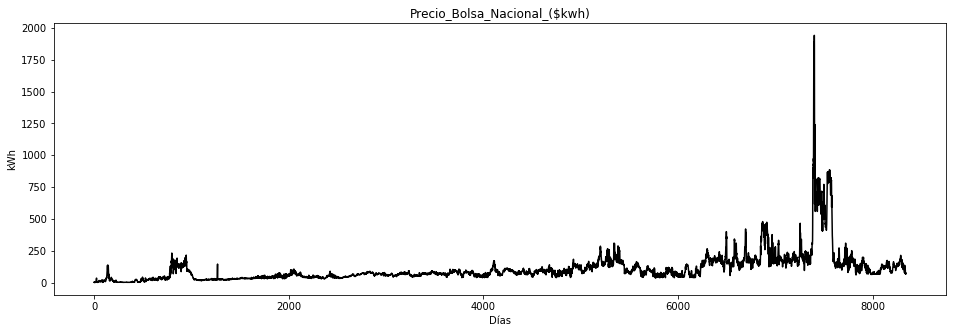

In [8]:
plot_prices(df_concatenated['mean'].values)

## 1.2 Transformación Box-Cox <a class="anchor" id="transformacion_boxcox"></a>

Las transformaciones de Box  Cox son una familia de transformaciones potenciales usadas en estadística para corregir sesgos en la distribución de errores, para corregir varianzas desiguales (para diferentes valores de la variable predictora) y principalmente para corregir la no linealidad en la relación (mejorar correlación entre las variables), está transformación se uso por consejo de varios compañeros.

In [9]:
from sklearn.preprocessing import PowerTransformer

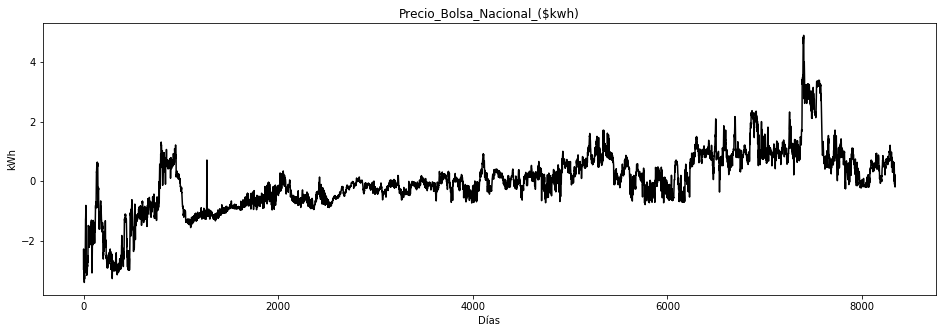

In [12]:
boxcox = PowerTransformer(method='box-cox')
x_transformed = boxcox.fit_transform(df_concatenated['mean'].values.reshape(-1, 1))
plot_prices(x_transformed)

# 2 Modelo <a class="anchor" id="modelo"></a>

Se definen las funciones encargadas del aprendizaje de los pesos del ADALINE y de la predicción de n días

In [13]:
def plot_y_vs_pred(y, pred):
    plt.figure(figsize=(14,3))
    plt.plot(y, color='black')
    plt.plot(pred, color='red')
    plt.show();

## 2.2 - ADALINE sin parámetros óptimos <a class="anchor" id="adaline_sin_parametros_optimos"></a>

### 2.2.1 Precalentamiento de los pesos del ADALINE <a class="anchor" id="precalentamiento_1"></a>

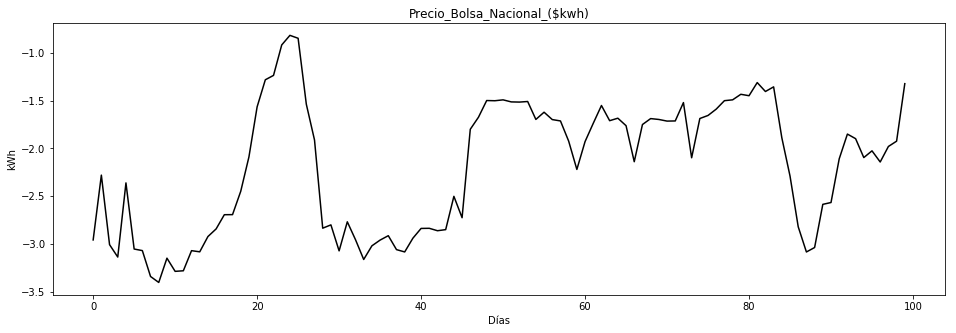

In [14]:
precalentamiento = x_transformed[0:100]
d_transformed = x_transformed[100:]
precalentamiento = precalentamiento.reshape(-1)
plot_prices(precalentamiento)

array([ 0.08042049,  0.5372632 ,  0.26459592,  0.23948941,  0.00208475,
       -0.02652094,  0.05092851, -0.2227998 , -0.07993338, -0.00817942,
       -0.01547358, -0.11927751, -0.10515381, -0.06452816,  0.07825691,
        0.15539613])

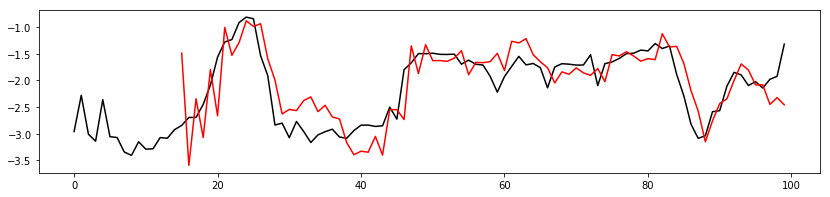

In [15]:
L = 15
mu = 0.006

w = np.array(0.1 * np.random.standard_normal(L+1))

y_pred = np.empty(len(precalentamiento))
y_pred[:] = np.nan

for i in range(4):
    for t in range(L, len(precalentamiento)):
        ## entrada al ADALINE
        x = np.concatenate([[1], precalentamiento[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = precalentamiento[t] - y_pred[t]
        w = w + 2 * mu * e * x

plt.figure(figsize=(14,3))
plt.plot(precalentamiento, color='black');
plt.plot(y_pred, color = 'red');
w

### 2.2.2 Entrenamiento del ADALINE <a class="anchor" id="entrenamiento_1"></a>

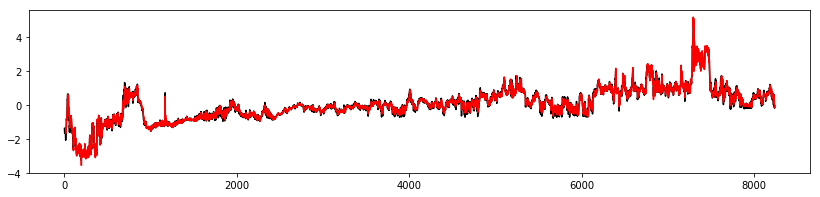

In [16]:
d = d_transformed.reshape(-1)
y_pred = np.empty(len(d))
y_pred[:] = np.nan

mu = 0.003

for i in range(4):
    for t in range(L, len(d)):
        ## entrada al ADALINE
        x = np.concatenate([[1], d[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = d[t] - y_pred[t]
        w = w + 2 * mu * e * x

plot_y_vs_pred(d, y_pred)

### 2.2.3 Generar el pronóstico para los precios de los próximos siete días. <a class="anchor" id="pronostico_1"></a>

**Aplicar transformación inversa box-cox a los resultados del pronóstico**

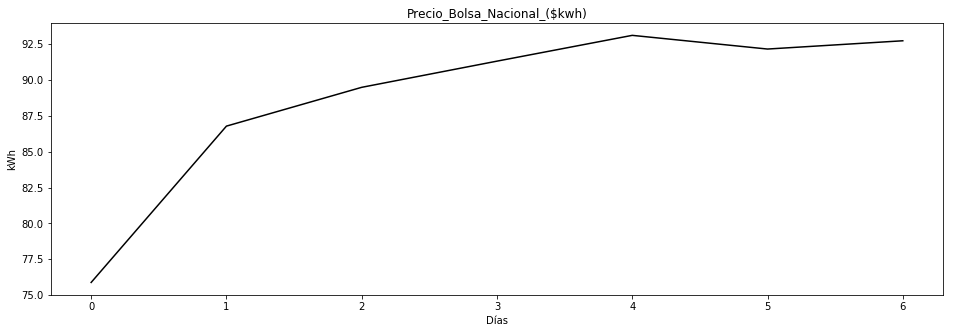

In [17]:
def model(d, w):
    x = np.concatenate([[1], d])
    y_pred = np.dot(w, x)
    return y_pred


pred = list(d[len(d) - L:])
for i in range(7):
    pred.append(model(pred[i:], w))


result_inverse = boxcox.inverse_transform(np.array(pred).reshape(-1, 1))
plot_prices(result_inverse[L:])

## 2.3 - ADALINE con parámetros óptimos <a class="anchor" id="adaline_con_parametros_optimos"></a>

### 2.3.1 Determinar los hiperparametros del modelo <a class="anchor" id="hiperparametros"></a>

1. Se define una función que se encarga de medir el desempeño (SSE) de un modelo y retornarlo.
2. Se define una función que itera sobre los diferentes parametros de entrenamiento (L, mu) y retorna los parametros de mejor desempeño

In [18]:
def sse_score_model(L, mu, pre, d_transformed):       
    y_pred = np.empty(len(pre))
    y_pred[:] = np.nan
    
    w = np.array(0.1 * np.random.standard_normal(L+1))
    for i in range(4):
        for t in range(L, len(pre)):
            ## entrada al ADALINE
            x = np.concatenate([[1], pre[t-L:t]])
            ## algoritmo de aprendizaje
            y_pred[t] = np.dot(w, x)
            e = pre[t] - y_pred[t]
            w = w + 2 * mu * e * x
                   
    SSE = []
    d = d_transformed.reshape(-1)
    
    y_pred = np.empty(len(d))
    y_pred[:] = np.nan
    
    for i in range(4):
        _sse = 0
        for t in range(L, len(d)):
            ## entrada al ADALINE
            x = np.concatenate([[1], d[t-L:t]])
            y_pred[t] = np.dot(w, x)

            ## algoritmo de aprendizaje
            e = d[t] - y_pred[t]
            
            _sse += e ** 2
            w = w + 2 * mu * e * x

        SSE.append(_sse)
        
    return SSE[-1]

In [19]:
def param_search(learning_rate, L, precalentamiento, d_transformed):
    score_mse = []    
    for mu in learning_rate:
        for l in L:
            result = sse_score_model(l, mu, precalentamiento, d_transformed)            
            params = {'mu': mu, 'L': l}
            score_mse.append((result, params))            
            print(f"{result:<10.2f} para {params}")

    return score_mse

In [20]:
result = np.array(param_search(
    learning_rate=[0.001, 0.002, 0.003], 
    L=[5, 10, 15, 20], 
    precalentamiento=precalentamiento, 
    d_transformed=d_transformed
))

i_min = np.argmin(result[:,0])
print(f'\nParámetros óptimos: {result[i_min, 1]}')
print(result[i_min])

175.11     para {'mu': 0.001, 'L': 5}
166.94     para {'mu': 0.001, 'L': 10}
171.29     para {'mu': 0.001, 'L': 15}
169.20     para {'mu': 0.001, 'L': 20}
164.37     para {'mu': 0.002, 'L': 5}
162.56     para {'mu': 0.002, 'L': 10}
162.96     para {'mu': 0.002, 'L': 15}
165.89     para {'mu': 0.002, 'L': 20}
164.98     para {'mu': 0.003, 'L': 5}
161.38     para {'mu': 0.003, 'L': 10}
164.20     para {'mu': 0.003, 'L': 15}
168.90     para {'mu': 0.003, 'L': 20}

Parámetros óptimos: {'mu': 0.003, 'L': 10}
[161.3778939240455 {'mu': 0.003, 'L': 10}]


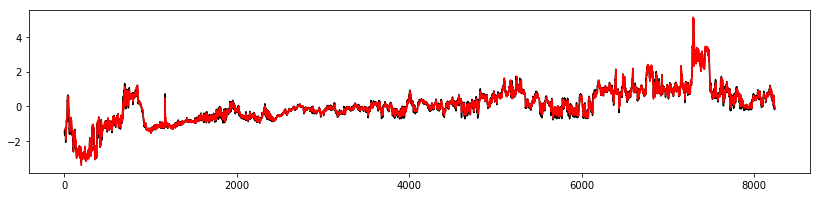

In [21]:
L = 10
mu = 0.003

w = np.array(0.1 * np.random.standard_normal(L+1))

y_pred = np.empty(len(precalentamiento))
y_pred[:] = np.nan

for i in range(4):
    for t in range(L, len(precalentamiento)):
        ## entrada al ADALINE
        x = np.concatenate([[1], precalentamiento[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = precalentamiento[t] - y_pred[t]
        w = w + 2 * mu * e * x
        
d = d_transformed.reshape(-1)
y_pred = np.empty(len(d))
y_pred[:] = np.nan

for i in range(4):
    _sse = 0
    for t in range(L, len(d)):
        ## entrada al ADALINE
        x = np.concatenate([[1], d[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = d[t] - y_pred[t]
        w = w + 2 * mu * e * x
        
plot_y_vs_pred(d, y_pred)

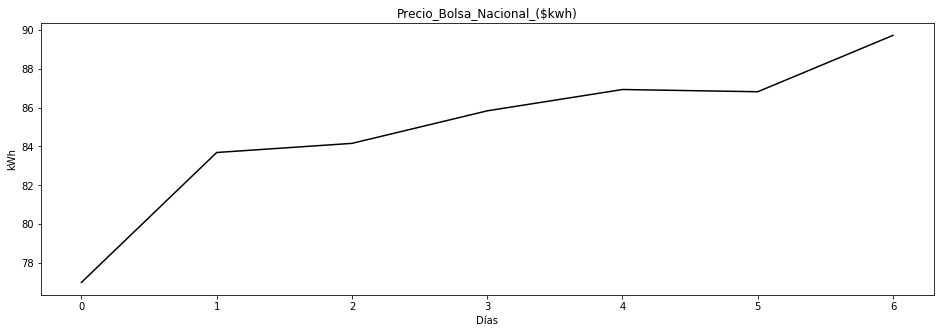

In [22]:
def model(d, w):
    x = np.concatenate([[1], d])
    y_pred = np.dot(w, x)
    return y_pred


pred = list(d[len(d) - L:])
for i in range(7):
    pred.append(model(pred[i:], w))


result_inverse = boxcox.inverse_transform(np.array(pred).reshape(-1, 1))
plot_prices(result_inverse[L:])